In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
x = np.linspace(0, 50, 501)

In [143]:
y = np.sin(x)

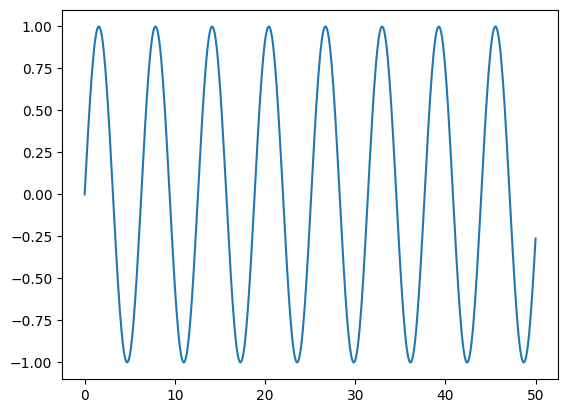

In [144]:
plt.plot(x, y)

In [145]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [146]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [147]:
test_percent = 0.1 

In [148]:
len(df) *  test_percent

50.1

In [149]:
test_point = np.round(len(df) * test_percent)

In [150]:
test_point

50.0

In [151]:
test_ind = int(len(df) - test_point)

In [152]:
test_ind

451

In [153]:
train_df = df.iloc[:test_ind]
test_df = df.iloc[test_ind:]

In [154]:
train_df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [155]:
test_df

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scaler = MinMaxScaler()

In [158]:
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.transform(test_df)

In [159]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [160]:
# help(TimeseriesGenerator)

In [161]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [162]:
len(scaled_train)

451

In [163]:
len(generator)  #451 - 50

401

In [164]:
X, y = generator[0]

In [165]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [166]:
y

array([[0.02053313]])

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [168]:
n_features = 1

In [169]:
model = Sequential()

In [170]:
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [171]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model.fit(generator, epochs=5)

Epoch 1/5
 66/401 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149  

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0347
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7180e-04
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4200e-04
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0214e-04
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6494e-05


In [173]:
losses = pd.DataFrame(model.history.history)

<Axes: >

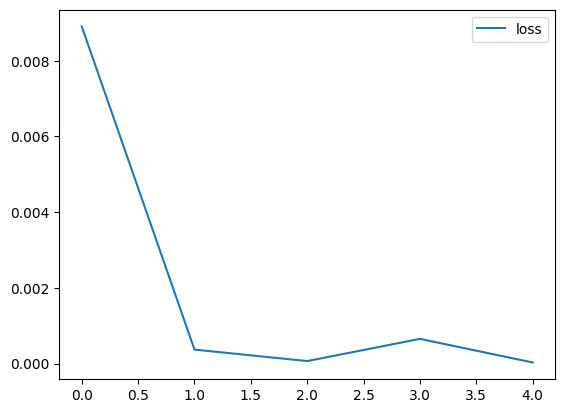

In [174]:
losses.plot()

In [175]:
first_eval_batch = scaled_train[-length:]

In [176]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [177]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.9447967]], dtype=float32)

In [178]:
scaled_test[0]

array([0.94955134])

In [179]:
test_preds = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(len(test_df)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━

In [180]:
test_preds

[array([0.9447967], dtype=float32),
 array([0.9638225], dtype=float32),
 array([0.97634923], dtype=float32),
 array([0.9833841], dtype=float32),
 array([0.9860556], dtype=float32),
 array([0.98299885], dtype=float32),
 array([0.9759189], dtype=float32),
 array([0.9641756], dtype=float32),
 array([0.945856], dtype=float32),
 array([0.9244189], dtype=float32),
 array([0.8990072], dtype=float32),
 array([0.86968607], dtype=float32),
 array([0.8364306], dtype=float32),
 array([0.79940873], dtype=float32),
 array([0.76040936], dtype=float32),
 array([0.71920747], dtype=float32),
 array([0.6739984], dtype=float32),
 array([0.6278842], dtype=float32),
 array([0.5807569], dtype=float32),
 array([0.53171325], dtype=float32),
 array([0.48201275], dtype=float32),
 array([0.43160066], dtype=float32),
 array([0.38124144], dtype=float32),
 array([0.3324904], dtype=float32),
 array([0.28344235], dtype=float32),
 array([0.23594107], dtype=float32),
 array([0.19172099], dtype=float32),
 array([0.149896

In [181]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [182]:
true_preds = scaler.inverse_transform(test_preds)

In [183]:
true_preds

array([[ 0.88958799],
       [ 0.92763929],
       [ 0.95269259],
       [ 0.96676216],
       [ 0.97210519],
       [ 0.96599171],
       [ 0.95183191],
       [ 0.92834548],
       [ 0.89170656],
       [ 0.84883281],
       [ 0.79800977],
       [ 0.73936797],
       [ 0.67285759],
       [ 0.59881443],
       [ 0.5208163 ],
       [ 0.43841318],
       [ 0.34799581],
       [ 0.25576813],
       [ 0.16151428],
       [ 0.06342775],
       [-0.03597245],
       [-0.13679581],
       [-0.23751344],
       [-0.33501471],
       [-0.43311006],
       [-0.52811186],
       [-0.6165513 ],
       [-0.70019991],
       [-0.77732791],
       [-0.84732859],
       [-0.90791458],
       [-0.95633806],
       [-0.99762595],
       [-1.02845786],
       [-1.04550787],
       [-1.05283139],
       [-1.04969823],
       [-1.03576314],
       [-1.01308325],
       [-0.97734858],
       [-0.93412953],
       [-0.8848942 ],
       [-0.82407431],
       [-0.75579125],
       [-0.6817807 ],
       [-0

In [184]:
test_df['Preds'] = true_preds

C:\Users\didig\AppData\Local\Temp\ipykernel_9116\2002009007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Preds'] = true_preds


In [185]:
test_df

,Sine,Preds
45.1,0.899097,0.889588
45.2,0.938307,0.927639
45.3,0.968142,0.952693
45.4,0.988304,0.966762
45.5,0.998591,0.972105
45.6,0.998900,0.965992
45.7,0.989229,0.951832
45.8,0.969673,0.928345
45.9,0.940429,0.891707
46.0,0.901788,0.848833


<Axes: >

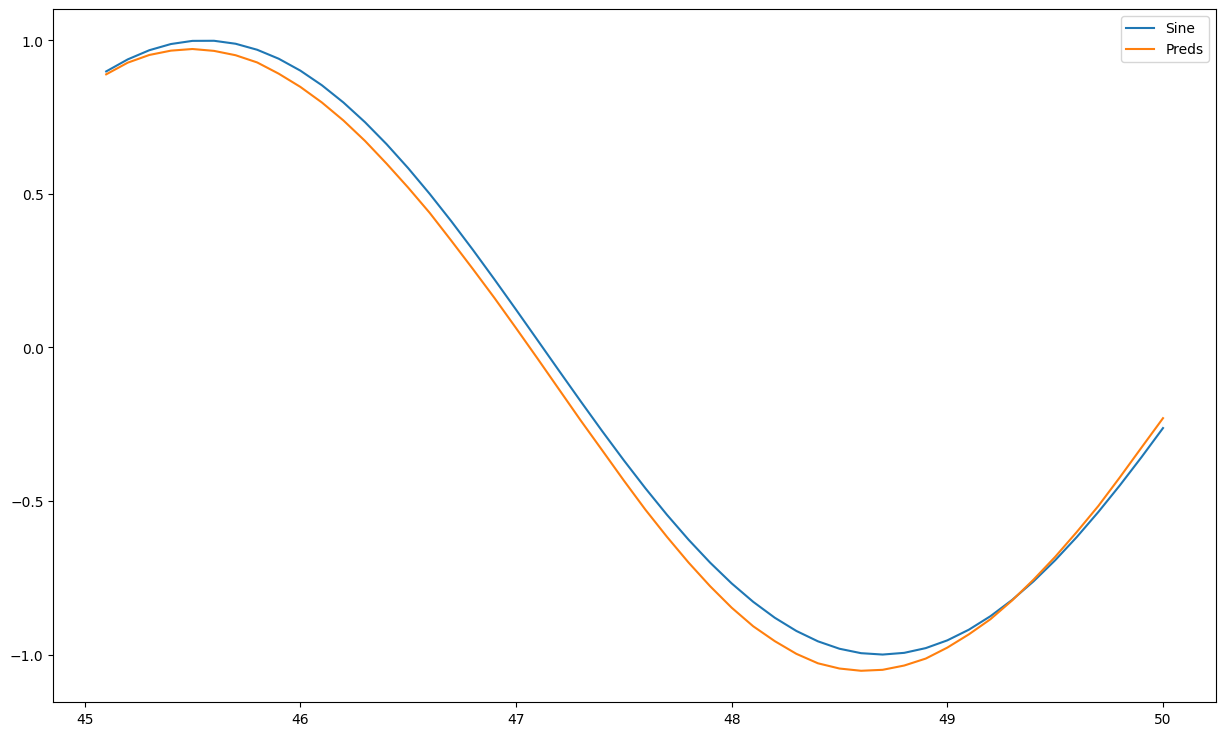

In [186]:
test_df.plot(figsize=(15, 9))

Using LSTMs and Forecasting

In [187]:
from tensorflow.keras.callbacks import EarlyStopping

In [188]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [189]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [190]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [191]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
 29/402 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1091

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0257 - val_loss: 1.3518e-06
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4105e-04 - val_loss: 2.3956e-05
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.2259e-04 - val_loss: 5.6241e-05


In [192]:
test_preds = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(len(test_df)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

C:\Users\didig\AppData\Local\Temp\ipykernel_9116\647691638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[' LSTMS Preds'] = true_preds


<Axes: >

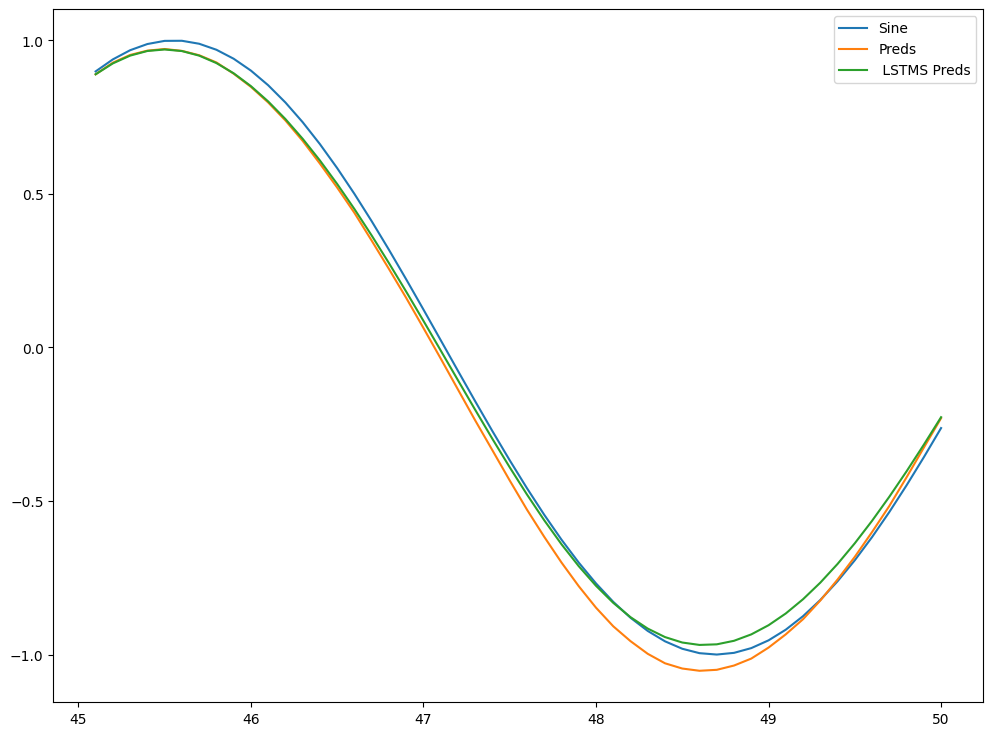

In [193]:
true_preds = scaler.inverse_transform(test_preds)
test_df[' LSTMS Preds'] = true_preds
test_df.plot(figsize=(12, 9))


<Axes: >

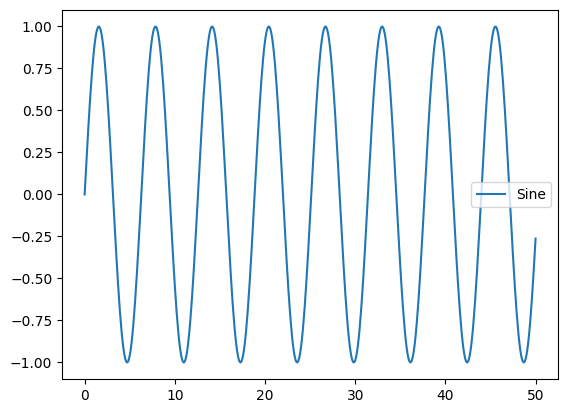

In [194]:
df.plot()

In [195]:
#Forecasting beyond 50

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [196]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [197]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [198]:
model.fit(generator, epochs=6)

Epoch 1/6
 41/452 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1624

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0408
Epoch 2/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1120e-04
Epoch 3/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.1268e-04
Epoch 4/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2802e-04
Epoch 5/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.6533e-05
Epoch 6/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5790e-04


In [199]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [200]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [201]:
forecast = scaler.inverse_transform(forecast)

In [202]:
25*0.1

2.5

In [203]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [204]:
len(forecast_index)

25

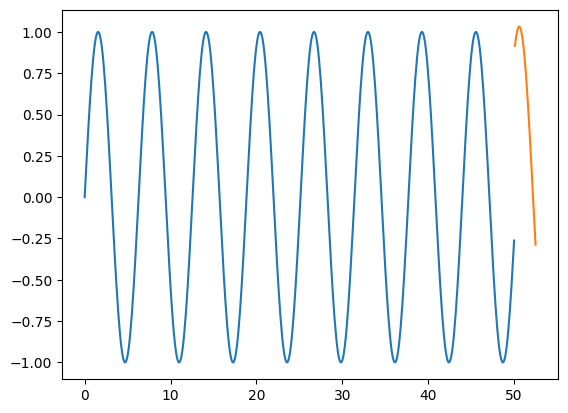

In [205]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)